# Пример использования слоя LSTM: классификация отзывов к фильмам

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 600  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)



Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 600)
input_test shape: (25000, 600)


In [2]:
from keras.layers import LSTM, Flatten, Dense, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

C:\Users\Admin\.conda\envs\tensorflow-37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.5437 - acc: 0.7416 - val_loss: 0.3548 - val_acc: 0.8592
Epoch 2/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.3106 - acc: 0.8788 - val_loss: 0.2969 - val_acc: 0.8822
Epoch 3/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2475 - acc: 0.9065 - val_loss: 0.3147 - val_acc: 0.8688
Epoch 4/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2114 - acc: 0.9212 - val_loss: 0.2872 - val_acc: 0.8860
Epoch 5/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1794 - acc: 0.9342 - val_loss: 0.3002 - val_acc: 0.8826
Epoch 6/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1647 - acc: 0.9418 - val_loss: 0.4078 - val_acc: 0.8786
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1418 - acc: 0.9492 - val_loss: 0.4315 - val_acc:

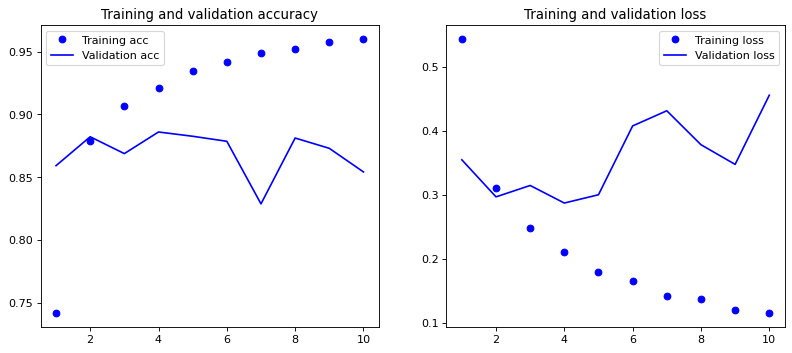

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5), dpi=80)

plt.subplot(1,2,1)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()